# MNIST Character Recognition Demo
 A basic CNN to train on the MNIST dataset.

Imports the TensorFlow library as it provides a high level API for creating CNN without adding the increaded complexity associated with Neural Networks.  
Tensorflow allow us to import and download the MNIST dataset directly from their API.

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

To visualize these numbers, we can get help from matplotlib.  
We basically have 60,000 images from the training dataset, to visualize. We use a random number generator to get an index to show.

3


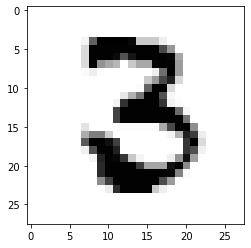

In [2]:
import matplotlib.pyplot as plt
import random
# matplotlib inline # Only use this if using iPython
image_index = random.randint(0,x_train.shape[0]) # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

We can now see the shape of our dataset.  
Here 60,000 and 10,000 represents the number of images in the train dataset.  
While (28, 28) represents the size of the image: 28 x 28 pixel. 

In [3]:
print('x_train shape:', x_train.shape)
print('x_train shape:', x_test.shape)

x_train shape: (60000, 28, 28)
x_train shape: (10000, 28, 28)


Here we first need to normalize the data before we can use it in a CNN.
Normalizing is a process that changes the range of pixel intensity values.
To achieve the we divide it by the maximum RGB code 255.

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


#### Main Part - The CNN itself
We use the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers.  
We have already talked about Conv2D, Maxpooling, and Dense layers.  
In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D arrays before building the fully connected layers.  
We can experiment with the first Dense layer, BUT the final Dense layer must have 10 neurons since we have 10 number classes (0,1,2,...,9).

In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Up untl now we only have a non-optimized empty CNN.  
Now we need to set an optimizer with a given loss funtion that uses a metric.  
We can experiment with the optimizer, loss function, metrics, and epochs.  
However, the adam optimzer outperforms the other optimizers.  

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Print out to see what the model looks like

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

Now we train or fit the model.  
Epoch values, simply put is the number of iterations the data is passed through the CNN. As this is a relatively small dataset with an average of 30 seconds to complete one epoch, we can easily experiment with it to find the best values.

In [8]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2143 - accuracy: 0.9351
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0884 - accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0597 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0467 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0368 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0318 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0273 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0228 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 29s 15m

Finally, we evaluate the trained model with x_test and y_test datasets.  
We see that for a basic model we have a pretty good accuracy of 98%.  

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0619 - accuracy: 0.9831


[0.061851318925619125, 0.9830999970436096]

Now we can test it out and visualize if it recognizes characters or digits from the dataset.  
Even if its hard for us to sometimes recognize the digit, the CNN is able to **predict what it most likely is**.

5


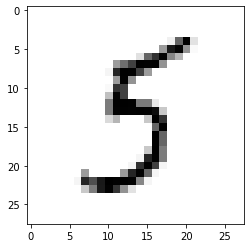

In [17]:
image_index = random.randint(0,x_test.shape[0])
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())